# **Task 4**

## **DJS Synapse Learning Period**
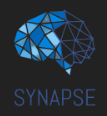

In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

<b>Read the titanic_data.csv using pandas and show the dataframe</b>

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# import ydata_profiling as pp

In [ ]:
# from google.colab import drive
# drive.mount("/content/gdrive")

In [23]:
#write code here
df = pd.read_csv("/Users/atharvmendhe/Downloads/titanic/train.csv")
df_test = pd.read_csv("/Users/atharvmendhe/Downloads/titanic/test.csv")
df_target = pd.read_csv("/Users/atharvmendhe/Downloads/titanic/gender_submission.csv")

In [24]:
df_target

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [25]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [26]:
merged_df = df_test.merge(df_target, on='PassengerId')
merged_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [27]:
final_df = pd.concat([df, merged_df])
final_df.reset_index(inplace=True)

In [28]:
final_df.drop('index', inplace=True, axis=1)

In [29]:
final_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [31]:
df = final_df

### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [33]:
# try researching about regex
df['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [34]:
def get_title(name):
  try:
    value = re.search(r"^[a-zA-Z'\s\-]+, ([A-Za-z]+)\.[A-Za-z\s-]+",name)
    return value.group(1)
  except(AttributeError):
    print("Wrong varaible passed into the fucntion")

In [49]:
df.drop('Title', inplace = True, axis = 1)

In [38]:
df['Title'] = 'Nan'

In [35]:
df['Title'] = df.apply(lambda row: get_title(row.Name), axis = 1)

Wrong varaible passed into the fucntion


In [36]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Jonkheer      1
Dona          1
Name: count, dtype: int64

### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [37]:
#write code here
df.drop(['Name','PassengerId','Ticket'], inplace = True, axis = 1)

In [38]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr
5,0,3,male,NaN,0,0,8.4583,NaN,Q,Mr
6,0,1,male,54.0,0,0,51.8625,E46,S,Mr
7,0,3,male,2.0,3,1,21.0750,NaN,S,Master
8,1,3,female,27.0,0,2,11.1333,NaN,S,Mrs
9,1,2,female,14.0,1,0,30.0708,NaN,C,Mrs


### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [39]:
#write code here
percentage_null = []
for i in df.columns:
  percentage_null.append([i,pd.isnull(df[i]).sum()/df.shape[0]])

In [40]:
percentage_null

[['Survived', 0.0],
 ['Pclass', 0.0],
 ['Sex', 0.0],
 ['Age', 0.20091673032849502],
 ['SibSp', 0.0],
 ['Parch', 0.0],
 ['Fare', 0.0007639419404125286],
 ['Cabin', 0.774637127578304],
 ['Embarked', 0.0015278838808250573],
 ['Title', 0.0007639419404125286]]

In [41]:
for column,percentage in percentage_null:
    if percentage > 0.50:
        print(percentage)
        df.drop(column, inplace=True, axis=1)

0.774637127578304


*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [42]:
df['Age'].fillna(int(df['Age'].mean()),inplace=True)

In [43]:
df['Embarked'].fillna(str(df['Embarked'].mode()),inplace=True)

In [44]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
1304,0,3,male,29.0,0,0,8.0500,S,Mr
1305,1,1,female,39.0,0,0,108.9000,C,Dona
1306,0,3,male,38.5,0,0,7.2500,S,Mr
1307,0,3,male,29.0,0,0,8.0500,S,Mr


In [45]:
final_df.dropna(inplace=True)

### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [46]:
#write code here
df['Family_members'] = df['SibSp'] + df['Parch']

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
#Normalize the columns ("Age", "Fare", "Family_members")
scaler  = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Family_members'] = scaler.fit_transform(df[['Family_members']])
df['Fare'] = scaler.fit_transform(df[['Fare']])


In [49]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,0.273456,1,0,0.014151,S,Mr,0.1
1,1,1,female,0.473882,1,0,0.139136,C,Mrs,0.1
2,1,3,female,0.323563,0,0,0.015469,S,Miss,0.0
3,1,1,female,0.436302,1,0,0.103644,S,Mrs,0.1
4,0,3,male,0.436302,0,0,0.015713,S,Mr,0.0
5,0,3,male,0.361142,0,0,0.016510,Q,Mr,0.0
6,0,1,male,0.674308,0,0,0.101229,S,Mr,0.0
7,0,3,male,0.022924,3,1,0.041136,S,Master,0.4
8,1,3,female,0.336089,0,2,0.021731,S,Mrs,0.2
9,1,2,female,0.173243,1,0,0.058694,C,Mrs,0.1


In [50]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')
df = pd.get_dummies(df, columns=['Pclass','Sex','Title','Embarked'],dtype=int)

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [51]:
#write code here
df_target = df['Survived']

In [52]:
df_target

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1307, dtype: int64

<b>remove the y_label (survived) from the dataframe</b>

In [53]:
#write code here
df.drop('Survived',inplace=True, axis=1)

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [55]:
from sklearn.model_selection import train_test_split

In [60]:
#write code here
X_train, X_test = train_test_split(df,test_size=0.3,random_state=42)

In [61]:
y_train, y_test = train_test_split(df_target, test_size=0.3, random_state=42)

In [62]:
X_train.shape

(914, 31)

In [63]:
X_train.isnull().sum()

Age                                               0
SibSp                                             0
Parch                                             0
Fare                                              0
Family_members                                    0
Pclass_1                                          0
Pclass_2                                          0
Pclass_3                                          0
Sex_female                                        0
Sex_male                                          0
Title_Capt                                        0
Title_Col                                         0
Title_Don                                         0
Title_Dona                                        0
Title_Dr                                          0
Title_Jonkheer                                    0
Title_Lady                                        0
Title_Major                                       0
Title_Master                                      0
Title_Miss  

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [258]:
from sklearn.tree import DecisionTreeClassifier

In [363]:
#write code here
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [364]:
dt_model.score(X_train,y_train)

0.9792122538293216

<b>Print the Model Accuracy</b>

In [365]:
#write code here
dt_model.score(X_test,y_test)

0.7989821882951654

In [366]:
train_score_list = {}
test_score_list = {}
for depth in range(1,10):
    dt_model_d = DecisionTreeClassifier(random_state=42,max_depth=depth)
    dt_model_d.fit(X_train,y_train)
    train_score_list[depth] = dt_model_d.score(X_train, y_train)
    test_score_list[depth] = dt_model_d.score(X_test, y_test)
    

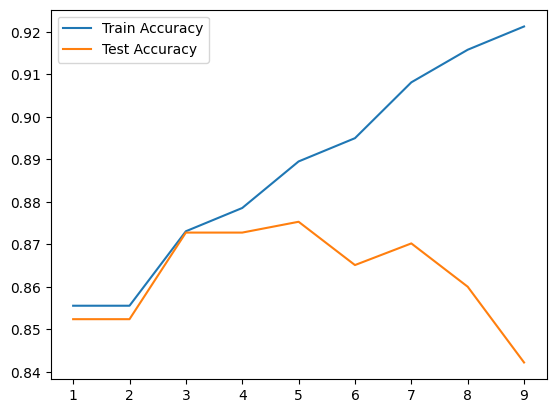

In [367]:
plt.plot(train_score_list.keys(), train_score_list.values(),label = "Train Accuracy")
plt.plot(test_score_list.keys(), test_score_list.values(), label = 'Test Accuracy')
plt.legend()
plt.show()

Max Accuracy at Max Depth  = 3, Score = 0.875
After Depth = 3, both the lines are diverging meanign the model overfitted on the traing data

In [368]:
train_score_list_a = {}
test_score_list_a = {}
for depth in range(1,10):
    dt_model_d = DecisionTreeClassifier(random_state=42,max_depth=depth,criterion='entropy')
    dt_model_d.fit(X_train,y_train)
    train_score_list_a[depth] = dt_model_d.score(X_train, y_train)
    test_score_list_a[depth] = dt_model_d.score(X_test, y_test)
    

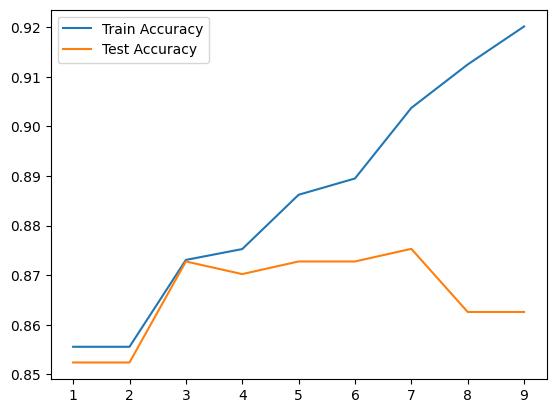

In [385]:
plt.plot(train_score_list_a.keys(), train_score_list_a.values(),label = "Train Accuracy")
plt.plot(test_score_list_a.keys(), test_score_list_a.values(), label = 'Test Accuracy')
plt.legend()
plt.show()

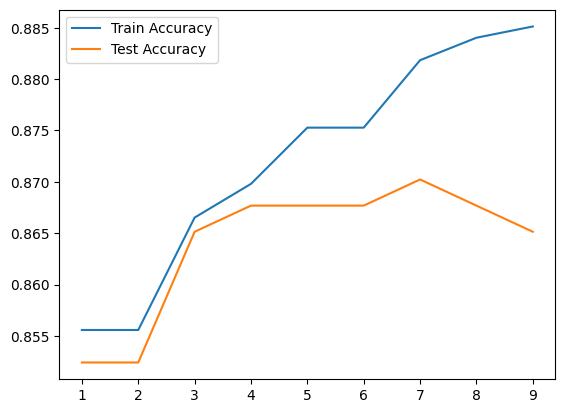

In [370]:
train_score_list_b = {}
test_score_list_b = {}
for depth in range(1,10):
    dt_model_d = DecisionTreeClassifier(random_state=42,max_depth=depth,criterion='gini', min_samples_split=40)
    dt_model_d.fit(X_train,y_train)
    train_score_list_b[depth] = dt_model_d.score(X_train, y_train)
    test_score_list_b[depth] = dt_model_d.score(X_test, y_test)

   
plt.plot(train_score_list_b.keys(), train_score_list_b.values(),label = "Train Accuracy")
plt.plot(test_score_list_b.keys(), test_score_list_b.values(), label = 'Test Accuracy')
plt.legend()
plt.show()


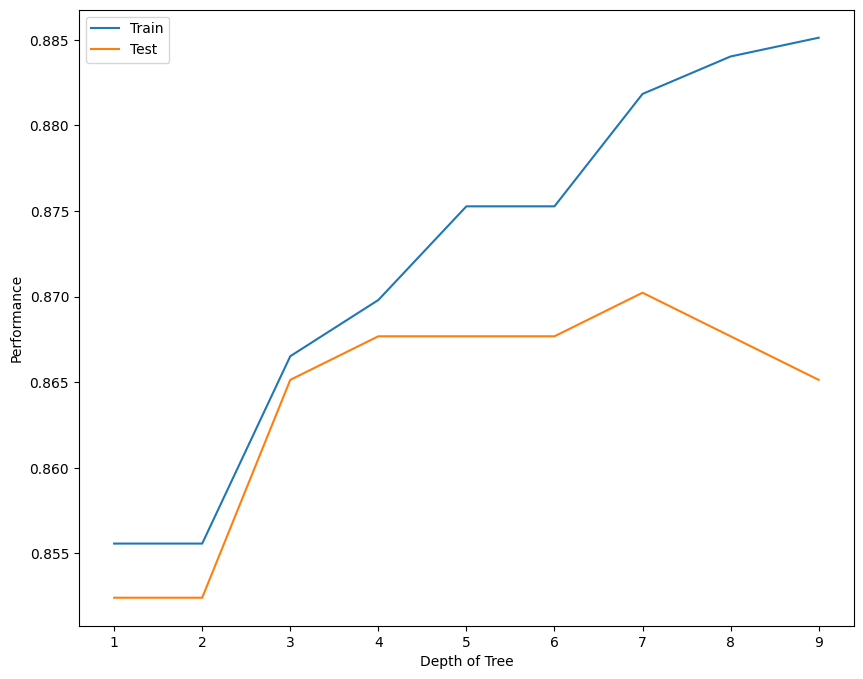

In [379]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,10)) ,train_score_list_b.values())
plt.plot(list(range(1,10)) ,test_score_list_b.values())
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend(["Train","Test"])
plt.show()

## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans:

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [ ]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)


In [174]:
from sklearn import tree
#!pip install graphviz
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)

In [175]:
#complete the code below to create an image of the decision tree
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

zsh:1: command not found: dot


FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here


## Explain: What is your understanding of the charts you made above?

Ans:

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [267]:
from sklearn.naive_bayes import GaussianNB

In [371]:
# Write a code to implement naive bayes algorithm, and give the accuracy for the same
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
nb_model.score(X_test,y_test)

0.7480916030534351

## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans: Naive Bayes is a probabilistic algorithm based on Bayes' theorem and Decision tree creates a tree like model of decisions and its possible consequences.
Naive Bayes assumes that all features are independent meaning presence of one feature doesn't affect another. Decision Tree makes no such assumption.
Naive Bayes is typically used with categorical data or data that can be discretized into categories. Decision trees can handle both categorical and numeric data without requiring any preprocessing.
Naive Bayes models are also relatively interpretable, but the decision-making process is not as straightforward to visualize as with decision trees. Decision trees are highly interpretable. You can visually inspect the tree structure to understand how decisions are made.

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [269]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [373]:
rf_model = RandomForestClassifier()

In [372]:
#write code here
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]

max_features = ['log2', 'sqrt']

max_depth = [2,4]

min_samples_split = [2,5]

min_samples_leaf = [1, 2]

bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [374]:
rf_grid = GridSearchCV(estimator=rf_model, param_grid=params_grid, cv = 3, verbose=2, n_jobs=4)

In [375]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.0s

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [376]:
print(rf_grid.best_params_,rf_grid.best_score_)
rf_grid.score(X_test,y_test)

{'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 33} 0.8654119930974978


0.8676844783715013

## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans: When the dataset is small, low dimensions, one feature dominance(i.e if we get a pure spilt in one of the features and that feature has a strong dominance, does that make sense??)

## Extra - BaggingClassifier

In [285]:
#write a code to implement BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

bc_model = BaggingClassifier()

bc_grid = GridSearchCV(estimator=bc_model,param_grid=params_grid, n_jobs=4, verbose=2)

bc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ....................bootstrap=True, n_estimators=10; total time=   0.0s
[CV] END ....................bootstrap=True, n_estimators=10; total time=   0.0s
[CV] END ....................bootstrap=True, n_estimators=10; total time=   0.0s
[CV] END ....................bootstrap=True, n_estimators=10; total time=   0.0s
[CV] END ....................bootstrap=True, n_estimators=10; total time=   0.0s
[CV] END ....................bootstrap=True, n_estimators=17; total time=   0.0s
[CV] END ....................bootstrap=True, n_estimators=17; total time=   0.0s
[CV] END ....................bootstrap=True, n_estimators=17; total time=   0.0s
[CV] END ....................bootstrap=True, n_estimators=17; total time=   0.0s
[CV] END ....................bootstrap=True, n_estimators=25; total time=   0.0s
[CV] END ....................bootstrap=True, n_estimators=25; total time=   0.0s
[CV] END ....................bootstrap=True, n_

GridSearchCV(estimator=BaggingClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [286]:
print(bc_grid.best_params_)
bc_grid.score(X_test,y_test)

{'bootstrap': True, 'n_estimators': 72}


0.8371501272264631

## Explain: What is the difference between Random Forest and Bagging Classifier

Ans:Random forest implements multiple decision tree classifer and passes them the subsets of traning data, on the other hand Bagging Classifier may implement multiple classification algorithm like SVC, Decision Tree, Logistic regression, KNN, Naive Bayes and pass them the subsets of data.

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [203]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [287]:
abc_model = AdaBoostClassifier()

abc_model.fit(X_train,y_train)

AdaBoostClassifier()

In [288]:
print(abc_model.score(X_train,y_train), abc_model.score(X_test,y_test))

0.8755458515283843 0.8702290076335878


{50: 0.8730853391684902, 51: 0.87527352297593, 52: 0.8730853391684902, 53: 0.87527352297593, 54: 0.8730853391684902, 55: 0.87527352297593, 56: 0.8730853391684902, 57: 0.8763676148796499, 58: 0.8730853391684902, 59: 0.8774617067833698}


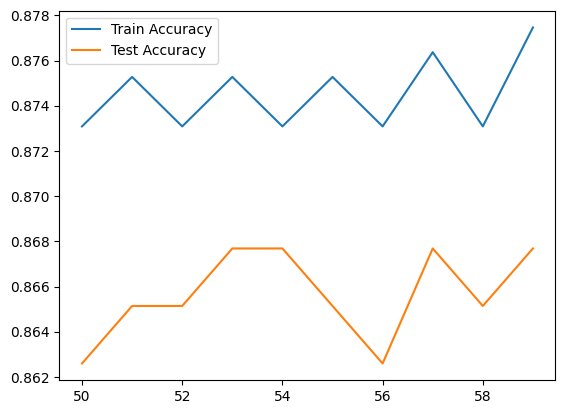

In [384]:
abc_train_score = {}
abc_test_score = {}
for n_estimators in range(50,60):
    abc_model_a = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=1)
    abc_model_a.fit(X_train,y_train)
    abc_train_score[n_estimators] = abc_model_a.score(X_train,y_train)
    abc_test_score[n_estimators] = abc_model_a.score(X_test,y_test)
   
print(abc_train_score)
plt.plot(abc_train_score.keys(), abc_train_score.values(),label = "Train Accuracy")
plt.plot(abc_test_score.keys(), abc_test_score.values(), label = 'Test Accuracy')
plt.legend()
plt.show()


In [65]:
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression(penalty='l1')

log_r.fit(X_train,y_train)

log_r.score(X_test,y_test)

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

## Explain: What is the difference between Bagging and Boosting?

Ans:

### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

In [ ]:
#write code here
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid


In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique


<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans:


# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **XG Boost Classifier and Regressor**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2023 - 2024